In [13]:
#!pip install bing-image-downloader
#!pip install scikit-image
#!pip install matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import random
import pathlib
import os

In [19]:
path = "fruits"

In [20]:
data_dir = pathlib.Path(path)
print(type(data_dir))

<class 'pathlib.WindowsPath'>


In [21]:
#get the class names
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple' 'orange' 'quava']


In [23]:
# view our image

def view_random_image(target_folder,target_class):
    folder = target_folder+target_class
    random_image = random.sample(os.listdir(folder),1)
    img = imread(folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img

(640, 480, 3)

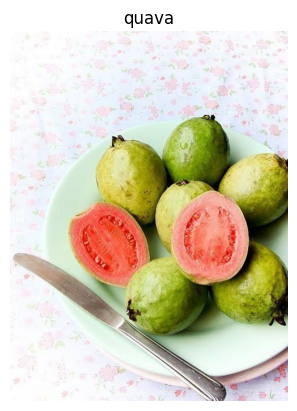

In [26]:
img=view_random_image(path+'/','quava')
img.shape

In [14]:
X=[]
y=[]
image=[]
class_names=['apple','orange','quava']
for i in class_names:
    class_num = class_names.index(i)
    path = os.path.join('fruits',i)
    for j in os.listdir(path):
        img = imread(os.path.join(path,j))
        img = resize(img,(150,150))
        X.append(img.flatten())
        y.append(class_num)
        image.append(img)

X = np.array(X)
y=np.array(y)
image = np.array(image)
    

In [47]:
X.shape, y.shape

((90, 67500), (90,))

In [27]:
# split our dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)


In [28]:
X_train.shape, y_train.shape

((72, 67500), (72,))

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
pred = model.predict(X_test)
pred

array([1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2])

In [55]:
y_test

array([1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(pred,y_test)

0.7777777777777778

In [35]:
# make predictions

def make_prediction(model,img):
    x=[]
    image = imread(img)
    image = resize(image,(150,150))
    plt.imshow(image)
    x.append(image.flatten())
    image=np.array(x)
    pred = model.predict(image)
 
    plt.title(class_names[pred[0]])
    plt.axis('off')
    return image

array([[1., 1., 1., ..., 1., 1., 1.]])

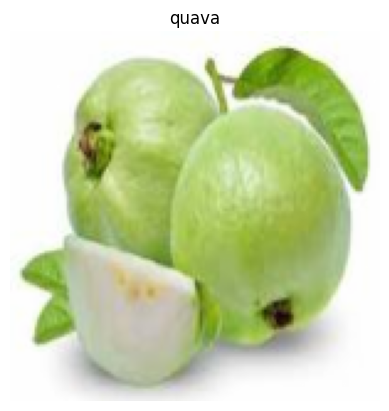

In [41]:
make_prediction(model,'g1.jpg')

In [42]:
import pickle

# save model
file_name = "ML"
pickle.dump(model,open(file_name,'wb'))

In [43]:
# load model
load_model = pickle.load(open(file_name,'rb'))
result= load_model.predict(X_test)
result

array([1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2])